In [2]:
import astropy.units as u
import astropy.constants as cr
from astropy.modeling import models
from astropy.modeling.blackbody import FLAM
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wav = np.arange(1000,9000) * u.AA # Wavelength scale in 1 Angstrom steps

In [4]:
# Compute AB magnitude in band:
fuv_band = [120, 180]*u.nm

# Set target AB magnitude:
target = 22*u.ABmag
# Convert to FLAM units
flux_conv = target.to(FLAM, equivalencies=u.spectral_density(wav))
print(flux_conv.unit)



erg / (Angstrom cm2 s)


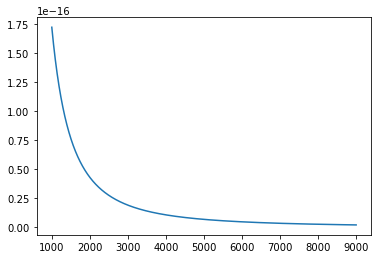

In [5]:
# This is what AB mags look like, flat in Fnu:
plt.plot(wav, flux_conv)
plt.show()

In [6]:
# Convert to photons per bin:

dw = 1*u.AA
ph_energy = (cr.h.cgs * cr.c.cgs / wav.cgs) / u.ph

# Convert to photon flux.
ph_flux = flux_conv * dw / ph_energy
print(ph_flux.unit)

ph / (cm2 s)


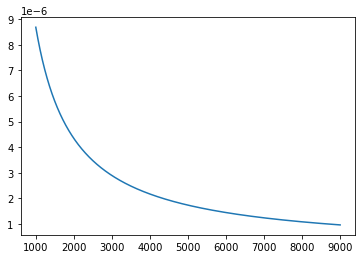

In [7]:
plt.plot(wav, ph_flux)
plt.show()

In [8]:
# Compute in-band rate:
fluence = ph_flux[(wav >= fuv_band[0].to(u.AA)) & (wav <= fuv_band[1].to(u.AA))].sum()
print(fluence)

0.0035224613056080347 ph / (cm2 s)


In [10]:
epd = 50 * u.cm
area = np.pi * (0.5*epd)**2
reflectivity = 0.9
mirrors = 3
dichroic = 0.4
qe = 0.5

rate = fluence * area * (reflectivity**mirrors) * dichroic * qe

In [11]:
print(rate) # This is 22 AB mag, so we can futz this up and down just scaling like magnitudes

1.0084018763030105 ph / s


In [16]:
cts = 600 * rate * u.s
np.sqrt(cts) / cts

<Quantity 0.0363624 1 / ph(1/2)>

In [17]:
np.sqrt(cts)

<Quantity 27.50093489 ph(1/2)>